## 1) Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

## ANSWER:

In [1]:
#Import necessary libraray
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [2]:
#Reading the Fraud Check Data
company = pd.read_csv("CData.csv")

In [3]:
#Let's find top five rows
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
#Let's find the columns names
company.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [5]:
#Let's find the number of null values in each columns
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
#Let's apply get_dummies
data=pd.get_dummies(data=company,columns=["ShelveLoc","Urban","US"])

In [7]:
#Let's find top five rows
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [8]:
#Let's assign x values
x = data.iloc[:,1:15]

In [9]:
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [10]:
#Let's assign y value
y = data.iloc[:,0]

In [11]:
y

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

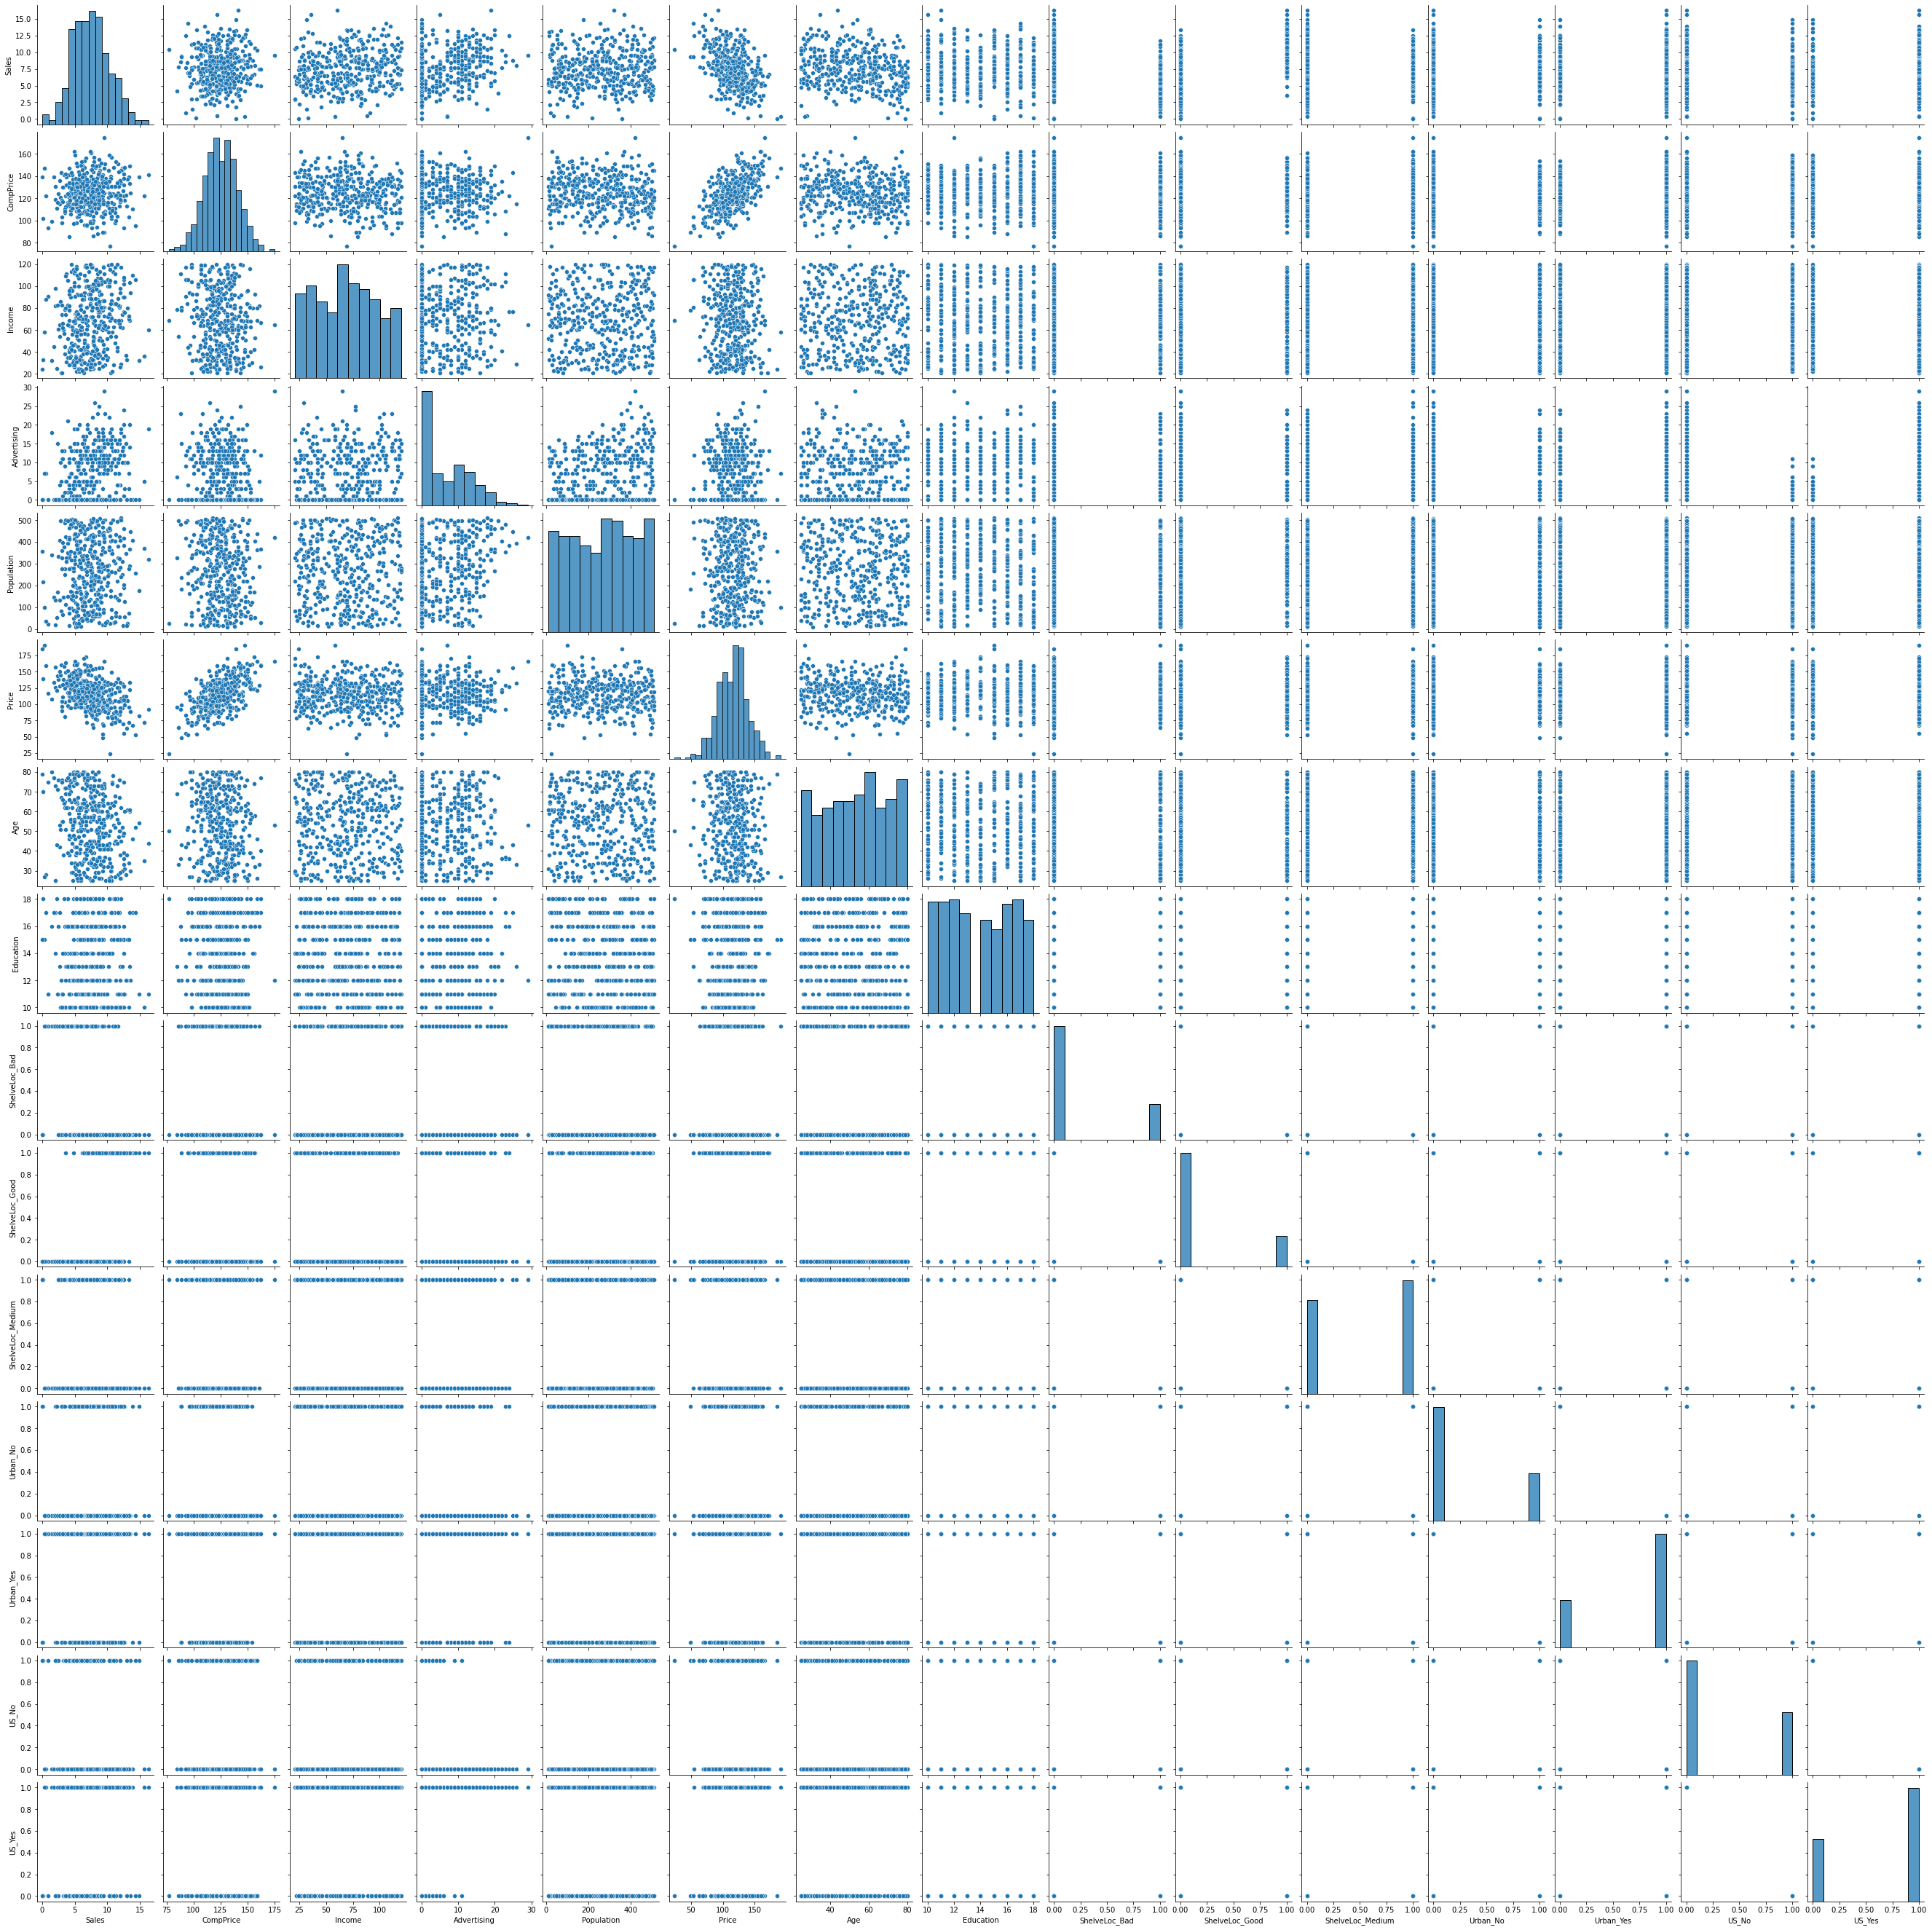

In [12]:
#Let's plot the graph
import seaborn as sns
sns.pairplot(data)

In [13]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [14]:
#Let's draw the information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales             400 non-null    float64
 1   CompPrice         400 non-null    int64  
 2   Income            400 non-null    int64  
 3   Advertising       400 non-null    int64  
 4   Population        400 non-null    int64  
 5   Price             400 non-null    int64  
 6   Age               400 non-null    int64  
 7   Education         400 non-null    int64  
 8   ShelveLoc_Bad     400 non-null    uint8  
 9   ShelveLoc_Good    400 non-null    uint8  
 10  ShelveLoc_Medium  400 non-null    uint8  
 11  Urban_No          400 non-null    uint8  
 12  Urban_Yes         400 non-null    uint8  
 13  US_No             400 non-null    uint8  
 14  US_Yes            400 non-null    uint8  
dtypes: float64(1), int64(7), uint8(7)
memory usage: 27.9 KB


In [15]:
#Let's find null value
data.isna().sum()

Sales               0
CompPrice           0
Income              0
Advertising         0
Population          0
Price               0
Age                 0
Education           0
ShelveLoc_Bad       0
ShelveLoc_Good      0
ShelveLoc_Medium    0
Urban_No            0
Urban_Yes           0
US_No               0
US_Yes              0
dtype: int64

C:\Users\91830\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='count'>

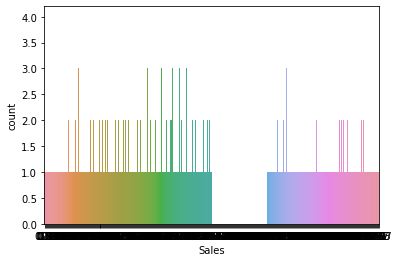

In [16]:
import seaborn as sns
data.Sales.value_counts()
sns.countplot(data.Sales)

In [17]:
#Let's apply given condition
data["SaleC"] = pd.cut(data["Sales"], bins = [0,4,8,14], labels = ["low","Average","High"], duplicates='drop')

In [18]:
#Let's Drop 
SalesDC = data.drop(columns=["Sales"])

In [19]:
SalesMDC = pd.get_dummies(SalesDC.drop(columns = ["SaleC"]))

In [20]:
SalesMDC

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [21]:
Sales_final = pd.concat([SalesMDC, SalesDC["SaleC"]], axis=1)

In [22]:
Sales_final

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,SaleC
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,High
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,High
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,High
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,Average
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1,High
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1,Average
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1,Average
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1,Average


In [23]:
Sales_final.dropna(subset = ["SaleC"], inplace = True)

In [24]:
Colnames = list(Sales_final.columns)
Colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'ShelveLoc_Bad',
 'ShelveLoc_Good',
 'ShelveLoc_Medium',
 'Urban_No',
 'Urban_Yes',
 'US_No',
 'US_Yes',
 'SaleC']

In [25]:
predictors = Colnames[:14]
predictors

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'ShelveLoc_Bad',
 'ShelveLoc_Good',
 'ShelveLoc_Medium',
 'Urban_No',
 'Urban_Yes',
 'US_No',
 'US_Yes']

In [26]:
target = Colnames[14]
target

'SaleC'

In [27]:
#Let's define x
X = Sales_final[predictors]

In [28]:
#Let's find shape
X.shape

(395, 14)

In [29]:
#Let's assign Y
Y = Sales_final[target]

In [30]:
Y

0         High
1         High
2         High
3      Average
4      Average
        ...   
395       High
396    Average
397    Average
398    Average
399       High
Name: SaleC, Length: 395, dtype: category
Categories (3, object): ['low' < 'Average' < 'High']

# Decision Tree Model

In [31]:
# Splitting data into training and testing data set
from sklearn.model_selection import train_test_split
train, test = train_test_split(Sales_final, test_size = 0.3)

In [32]:
Sales_final["SaleC"].unique()

['High', 'Average', 'low']
Categories (3, object): ['low' < 'Average' < 'High']

## Building Decision Tree Classifier using Entropy Criteria

In [33]:
from sklearn.tree import DecisionTreeClassifier
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choos

In [34]:
#Build a model
model = DecisionTreeClassifier(criterion = "entropy",max_depth=3)
model.fit(train[predictors], train[[target]])

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [35]:
model.get_n_leaves()

8

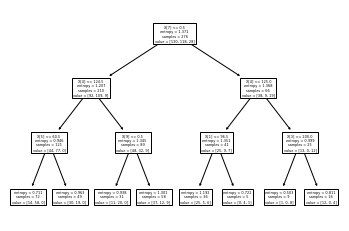

In [36]:
#Let's Draw Tree
from sklearn import tree #To draw tree
tree.plot_tree(model);

In [37]:
 # predicting on test data set
preds = model.predict(test[predictors])
preds

array(['High', 'High', 'High', 'Average', 'Average', 'Average', 'High',
       'Average', 'High', 'High', 'Average', 'Average', 'High', 'Average',
       'Average', 'Average', 'High', 'Average', 'High', 'Average', 'High',
       'Average', 'High', 'High', 'High', 'High', 'Average', 'Average',
       'Average', 'Average', 'Average', 'Average', 'Average', 'High',
       'Average', 'High', 'Average', 'High', 'Average', 'High', 'Average',
       'Average', 'High', 'Average', 'Average', 'low', 'low', 'High',
       'High', 'Average', 'High', 'Average', 'High', 'High', 'Average',
       'High', 'Average', 'Average', 'Average', 'High', 'Average',
       'Average', 'Average', 'High', 'Average', 'High', 'Average', 'High',
       'High', 'High', 'Average', 'Average', 'High', 'Average', 'Average',
       'Average', 'Average', 'High', 'Average', 'Average', 'Average',
       'High', 'High', 'High', 'High', 'High', 'High', 'High', 'Average',
       'High', 'High', 'High', 'Average', 'High', 'High', 

In [38]:
# getting the count of each category 
pd.Series(preds).value_counts()

Average    64
High       53
low         2
dtype: int64

In [39]:
72/(72+44+3)

0.6050420168067226

In [40]:
# getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(test[target],preds)

col_0,Average,High,low
SaleC,,,
low,6,1,0
Average,43,25,2
High,15,27,0


In [41]:
temp = pd.Series(model.predict(train[predictors])).reset_index(drop=True)
np.mean(pd.Series(train.SaleC).reset_index(drop=True)==pd.Series(model.predict(train[predictors])))
np.mean(preds==test.SaleC)

0.5882352941176471

#### Decision Tree Regression Example

In [42]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [43]:
array = data.values
X = data.iloc[:,1:15]
y = data.iloc[:,0]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [45]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [46]:
#Find the accuracy
model.score(X_test,y_test)

0.28351839208849283

In [47]:
#Find the accuracy
model.score(X_train,y_train)

1.0